Práctica 1 Diplomado
Fanny P. Lemus García

In [1]:
import sys
sys.path.append('/Users/fannylemus/Documents/Diplomado/Modulo1/practica1')

In [2]:
# importamos las librerias necesarias para scrapeo, solicitudes de la página, manipulación de datos y gráficos
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cufflinks as cf
import os
import requests
from bs4 import BeautifulSoup
import requests


/Users/fannylemus/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning:

urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [48]:
# Lectura de datos
#Se intentó construir una función con base en la url de cada archivo, pero dado que varios archivos no tienen una dirección 
# con un patrón, se optó por scrapear los url de la página que terminaran con csv.

# URL de la página de Ecobici CDMX con datos abiertos
url = 'https://ecobici.cdmx.gob.mx/datos-abiertos'

# Define la carpeta donde quieres guardar los archivos
folder_path = "/Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data"  

# Crea la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Envía una solicitud GET a la página
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Parsea el contenido HTML de la página usando BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra todos los enlaces en la página que terminen en '.csv'
csv_urls = [link.get('href') for link in soup.find_all('a') if link.get('href') and link.get('href').endswith('.csv')]

# Descarga cada archivo CSV encontrado
for csv_url in csv_urls:
    # Asegúrate de que la URL sea completa (incluyendo el dominio si es necesario)
    if not csv_url.startswith('http'):
        csv_url = 'https://ecobici.cdmx.gob.mx' + csv_url

    # Realiza la solicitud GET para descargar el archivo
    try:
        response = requests.get(csv_url)
        response.raise_for_status()  # Asegura que la solicitud fue exitosa

        # Extrae el nombre del archivo del URL
        filename = csv_url.split('/')[-1]

        # Define la ruta completa donde guardar el archivo
        file_path = os.path.join(folder_path, filename)

        # Guarda el contenido en un archivo local
        with open(file_path, 'wb') as file:
            file.write(response.content)

        print(f'Descargado: {filename} en {folder_path}')
    except Exception as e:
        print(f'Error descargando {csv_url}: {e}')


Descargado: ecobici_2024_enero.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: 2024-02.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: datos_abiertos_2024_03-1.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: ecobici_2023_01.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: ecobici_2023_02.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: ecobici_2023_03.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: ecobici_2023_04.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: ecobici_2023_05.csv en /Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data
Descargado: ecobici_2023_06.csv en /Users/fannylemus/Documen

In [3]:
# Se leen todos los elementos csv de la carpeta Historical_data
archivos=os.listdir("/Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data")
archivos

['2020-02.csv',
 '2018-06.csv',
 '2018-12.csv',
 '2016-03.csv',
 '2014-12.csv',
 '2014-06.csv',
 'ecobici_2022_12.csv',
 '2022-07.csv',
 '2022-06.csv',
 '2014-07.csv',
 '2016-02.csv',
 '2018-07.csv',
 '2020-03.csv',
 '2020-01.csv',
 '2018-11.csv',
 '2018-05.csv',
 '2011-09.csv',
 '2014-05.csv',
 '2014-11.csv',
 '2010-07-jul.csv',
 'ecobici_2022_11.csv',
 '2022-04.csv',
 '2022-05.csv',
 'ecobici_2022_10.csv',
 '2014-10.csv',
 '2014-04.csv',
 '2016-01.csv',
 '2011-08.csv',
 '2018-04.csv',
 '2018-10.csv',
 '2020-10.csv',
 '2020-04.csv',
 '2016-05.csv',
 '2016-11.csv',
 '2013-09.csv',
 '2022-01.csv',
 '2014-01.csv',
 '2013-08.csv',
 '2010-05-may.csv',
 '2018-01.csv',
 '2016-10.csv',
 '2016-04.csv',
 '2020-05.csv',
 '2020-11.csv',
 '2020-07.csv',
 'datosabiertos_2023_octubre.csv',
 '2016-12.csv',
 '2016-06.csv',
 '2018-03.csv',
 '2014-03.csv',
 '2022-02.csv',
 '2010-06-jun.csv',
 '2022-03.csv',
 '2014-02.csv',
 '2018-02.csv',
 '2016-07.csv',
 'datos_abiertos_2024_03-1.csv',
 '2020-12.csv',


In [4]:
# Se toma una muestra aleatoria de 10000 registros de cada csv y se inserta en un dataframe de pandas
# Nombres de columnas normalizados para el DataFrame final
nuevos_nombres_columnas = ['Genero_Usuario', 'Edad_Usuario',	'Bici',	'Ciclo_Estacion_Retiro',
        	'Fecha_Retiro',	'Hora_Retiro',	'Ciclo_EstacionArribo',	'Fecha_Arribo',	'Hora_Arribo']

# Suponiendo que tienes múltiples archivos CSV en un directorio
directory_path = '/Users/fannylemus/Documents/Diplomado/Modulo1/practica1/practica1/historical_data'
all_samples = []  # Lista para almacenar las muestras de cada archivo

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        
        # Detectar la codificación del archivo usando chardet
        with open(file_path, 'rb') as file:
            result = chardet.detect(file.read(10000))  # Lee solo los primeros 10,000 bytes para la detección
            encoding = result['encoding']
            print(f"La codificación detectada para {filename} es: {encoding}")

        # Cargar el archivo CSV con la codificación detectada
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Nombres de columnas en {filename}: {df.columns.tolist()}")

            # Tomar una muestra aleatoria del DataFrame (p.ej., 10% de las filas)
            sample_df = df.sample(frac=0.1, replace=False, random_state=1)
            
            # Normalizar los nombres de las columnas para que coincidan con los nuevos nombres
            sample_df.columns = nuevos_nombres_columnas
            
            # Agregar la muestra a la lista
            all_samples.append(sample_df)
            
        except Exception as e:
            print(f"Error al leer {filename} con la codificación {encoding}: {e}")

# Combinar todas las muestras en un solo DataFrame#
final_df = pd.concat(all_samples, ignore_index=True)
print("DataFrame final combinado:")
print(final_df.head())


La codificación detectada para 2020-02.csv es: ascii
Nombres de columnas en 2020-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-06.csv es: ascii
Nombres de columnas en 2018-06.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-12.csv es: ascii
Nombres de columnas en 2018-12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2016-03.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2014-12.csv es: ascii
Nombres de columnas en 2014-12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2014-06.csv es: ascii
Nombres de columnas en 2014-06.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2022_12.csv es: ascii
Nombres de columnas en ecobici_2022_12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2022-07.csv es: UTF-8-SIG
Nombr

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-07.csv es: ascii
Nombres de columnas en 2018-07.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-03.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2020-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-01.csv es: ascii
Nombres de columnas en 2020-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-11.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2018-11.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-05.csv es: ascii
Nombres de columnas en 2018-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2011-09.csv es: ascii
Nombres de columnas en 2011-09.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2014-05.csv es: ascii
Nombres de columnas en 2014-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2014-11.csv es: ascii
Nombres de columnas en 2

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2014-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2014-04.csv es: ascii
Nombres de columnas en 2014-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2016-01.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2011-08.csv es: ascii
Nombres de columnas en 2011-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-04.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2018-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-10.csv es: ascii
Nombres de columnas en 2018-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-10.csv es: UTF-8-SIG
Nombres de columnas en 2020-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-04.csv es: UTF-8-SIG
Nombres de columnas en 2020-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2016-05.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2016-11.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-11.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2013-09.csv es: ascii
Nombres de columnas en 2013-09.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2022-01.csv es: UTF-8-SIG
Nombres de columnas en 2022-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2014-01.csv es: ascii
Nombres de columnas en 2014-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2013-08.csv es: ascii
Nombres de columnas e

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2018-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2016-10.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2016-04.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-05.csv es: UTF-8-SIG
Nombres de columnas en 2020-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-11.csv es: UTF-8-SIG
Nombres de columnas en 2020-11.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-07.csv es: UTF-8-SIG
Nombres de columnas en 2020-07.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para datosabiertos_2023_octubre.csv es:

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-06.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-03.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2018-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2014-03.csv es: ascii
Nombres de columnas en 2014-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2022-02.csv es: UTF-8-SIG


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2022-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2010-06-jun.csv es: ascii
Nombres de columnas en 2010-06-jun.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2022-03.csv es: UTF-8-SIG


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2022-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2014-02.csv es: ascii
Nombres de columnas en 2014-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-02.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2018-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2016-07.csv es: ascii
Nombres de columnas en 2016-07.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para datos_abiertos_2024_03-1.csv es: ISO-8859-1
Nombres de columnas en datos_abiertos_2024_03-1.csv: ['Viaje_Id', 'Usuario_Id', 'Genero', 'Año_de_nacimiento', 'Inicio_del_viaje', 'Fin_del_viaje', 'Origen_Id', 'Destino_Id']
Error al leer datos_abiertos_2024_03-1.csv con la codificación ISO-8859-1: Length mismatch: Expected axis has 8 elements, new values have 9 elements
La codificación detectada para 2020-12.csv es: UTF-8-SIG
Nombres de columnas en 2020-12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fech

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2017-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-09.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2017-09.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2021-08.csv es: UTF-8-SIG
Nombres de columnas en 2021-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2012-05.csv es: ascii
Nombres de columnas en 2012-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2012-11.csv es: ascii
Nombres de columnas en 2012-11.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2010-12-dic.csv es: ascii
Nombres de column

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_08.csv es: ascii
Nombres de columnas en ecobici_2023_08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2019-08.csv es: ascii
Nombres de columnas en 2019-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2019-09.csv es: ascii
Nombres de columnas en 2019-09.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_09.csv es: ascii
N

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-09.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2015-04.csv es: ascii
Nombres de columnas en 2015-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2015-10.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_04.csv es: ascii
Nombres de columnas en ecobici_2023_04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2017-01.csv es: ascii
Nombres de columnas en 2017-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2019-10.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2019-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2019-04.csv es: ascii
Nombres de columnas en 2019-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2019-05.csv es: ascii
Nombres de columnas en 2019-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2019-11.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2019-11.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2021-01.csv es: ascii
Nombres de columnas en 2021-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_05.csv es: ascii
Nombres de columnas en ecobici_2023_05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2015-11.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-11.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2015-05.csv es: ascii
Nombres de columnas en 2015-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2015-07.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-07.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_07.csv es: ascii
Nombres de columnas en ecobici_2023_07.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2010-11-nov.csv es: ascii
Nombres de columnas en 2010-11-nov.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2021-03.csv es: UTF-8-SIG
Nombres de columnas en 2021-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora Arribo']
La codificación detectada para 2017-02.csv es: asci

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2019-12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2019-06.csv es: ascii
Nombres de columnas en 2019-06.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-03.csv es: ascii
Nombres de columnas en 2017-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2021-02.csv es: UTF-8-SIG
Nombres de columnas en 2021-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_06.csv es: ascii
Nombres de c

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-06.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2015-12.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2015-02.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_02.csv es: ascii
Nombres de columnas en ecobici_2023_02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2021-06.csv es: UTF-8-SIG
Nombres de columnas en 2021-06.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Retiro.1']
La codificación detectada para 2021-12.csv es: UTF-8-SIG
Nombres de columnas en 2021-12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2019-02.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2019-02.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-07.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2017-07.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-06.csv es: ascii
Nombres de columnas en 2017-06.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-12.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2017-12.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2019-03.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2019-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo', 'Unnamed: 9']
Error al leer 2019-03.csv con la codificación ascii: Length mismatch: Expected axis has 10 elements, new values have 9 elements
La codificación detectada para 2021-07.csv es: UTF-8-SIG
Nombres de columnas en 2021-07.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_03.csv es: ascii
Nombres de columnas en ecobici_2023_03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2015-03.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2015-03.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2015-01.csv es: ascii
Nombres de columnas en 2015-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2012-08.csv es: ascii
Nombres de columnas en 2012-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2023_01.csv es: ascii
Nombres de columnas en ecobici_2023_01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2021-11.csv es: ascii
Nombres d

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2019-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-04.csv es: ascii
Nombres de columnas en 2017-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-10.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2017-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-11.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2017-11.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2017-05.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2017-05.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2021-04.csv es: UTF-8-SIG
Nombres de columnas en 2021-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora Arribo']
La codificación detectada para 2021-10.csv es: UTF-8-SIG
Nombres de columnas en 2021-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2011-01-ene.csv es: ascii
Nombres de columnas en 2011-01-ene.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para datosabiertos_2023_noviembre.csv

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2016-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2020-09.csv es: UTF-8-SIG
Nombres de columnas en 2020-09.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para ecobici_2024_enero.csv es: ascii
Nombres de columnas en ecobici_2024_enero.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2018-09.csv es: ascii
Nombres de columnas en 2018-09.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2011-11.csv es: ascii

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2022-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo', 'Hora_Arribo']
La codificación detectada para 2013-01.csv es: ascii
Nombres de columnas en 2013-01.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2014-08.csv es: ascii
Nombres de columnas en 2014-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2011-04.csv es: ascii


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/2575700666.py:26: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Nombres de columnas en 2011-04.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2011-10.csv es: ascii
Nombres de columnas en 2011-10.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2018-08.csv es: ascii
Nombres de columnas en 2018-08.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2010-09-sep.csv es: ascii
Nombres de columnas en 2010-09-sep.csv: ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo', 'Hora_Arribo']
La codificación detectada para 2011-06.csv es: ascii
Nombres de colum

In [46]:
final_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9327292 entries, 0 to 9327291
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   object 
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), object(8)
memory usage: 640.5+ MB


In [47]:
final_df.shape

(9327292, 9)

In [48]:
df=final_df
# Convertimos los nombres de las columnas a minúsculas
df.columns = [col.lower() for col in df.columns]

# Vemos el head de nuestro df para ver cómo se ven los datos
df.head()

,genero_usuario,edad_usuario,bici,ciclo_estacion_retiro,fecha_retiro,hora_retiro,ciclo_estacionarribo,fecha_arribo,hora_arribo
0,M,50.0,11112,177,14/02/2020,13:24:04,181,14/02/2020,13:30:54
1,F,31.0,10927,137,18/02/2020,17:30:33,182,18/02/2020,17:47:01
2,M,29.0,9801,99,07/02/2020,16:59:33,121,07/02/2020,17:10:38
3,M,28.0,7713,258,28/02/2020,10:34:08,57,28/02/2020,10:47:33
4,M,29.0,11966,40,22/02/2020,18:48:11,306,22/02/2020,19:18:24


In [50]:
# Ahora vamos a ver los tipos de datos que tenemos en nuestro df
cvars = list(df.describe())
cvars

['edad_usuario']

In [51]:
# Se convierten las variables a tipo categoría
dvars= [x for x in df.columns if x not in cvars + ['fecha_retiro','hora_retiro', 'fecha_arribo', 'hora_arribo','edad_usuario']]
dvars

['genero_usuario', 'bici', 'ciclo_estacion_retiro', 'ciclo_estacionarribo']

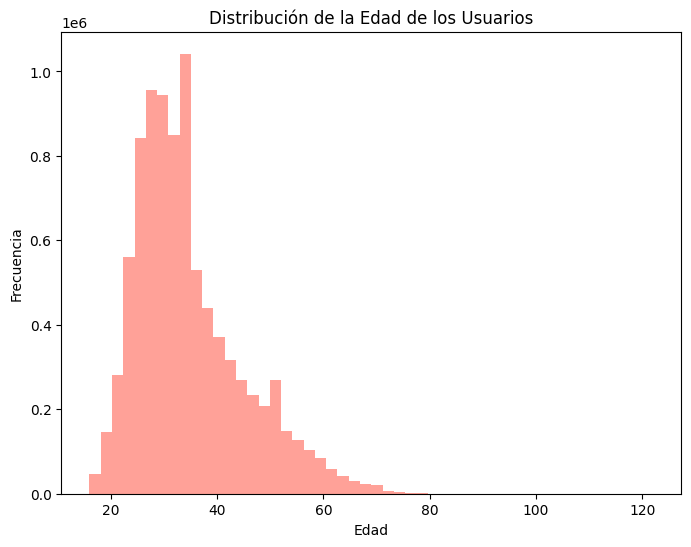

In [76]:
# Primero se observa la distribución de la variable Edad_Usuario para ver cuáles grupos de edad 
# son los más frecuentes y con base a eso, hacer una segmentación de la variable.
plt.figure(figsize=(8, 6))
plt.hist(df['edad_usuario'], bins=50, color='#ff796c', alpha=0.7)
plt.title('Distribución de la Edad de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [54]:
# Definir los límites de los grupos de edad.
bins = [0, 25, 30, 40, 50, float('inf')]
group_names = ['hasta 25', '26 a 30', '31 a 40', '41 a 50', 'mayor a 50']

# Crear una nueva columna en el DataFrame para almacenar los grupos de edad.
df['grupo_edad'] = pd.cut(df['edad_usuario'], bins, labels=group_names, right=False)
df.head()

,genero_usuario,edad_usuario,bici,ciclo_estacion_retiro,fecha_retiro,hora_retiro,ciclo_estacionarribo,fecha_arribo,hora_arribo,grupo_edad
0,M,50.0,11112,177,14/02/2020,13:24:04,181,14/02/2020,13:30:54,mayor a 50
1,F,31.0,10927,137,18/02/2020,17:30:33,182,18/02/2020,17:47:01,31 a 40
2,M,29.0,9801,99,07/02/2020,16:59:33,121,07/02/2020,17:10:38,26 a 30
3,M,28.0,7713,258,28/02/2020,10:34:08,57,28/02/2020,10:47:33,26 a 30
4,M,29.0,11966,40,22/02/2020,18:48:11,306,22/02/2020,19:18:24,26 a 30


In [56]:
# Para convervir las variables de hora a time, se convierte primero a string
df['hora_retiro'] = df['hora_retiro'].astype(str)
df['hora_arribo'] = df['hora_arribo'].astype(str)

# Se quitan los milisegundos de las horas de retiro y arribo
df['hora_retiro'] = df['hora_retiro'].str.split('.').str[0]
df['hora_arribo'] = df['hora_arribo'].str.split('.').str[0]


# Convertir las variables de horas a tipo time
df['hora_retiro'] = pd.to_datetime(df['hora_retiro'], format='%H:%M:%S', errors='coerce').dt.time
df['hora_arribo'] = pd.to_datetime(df['hora_arribo'], format='%H:%M:%S', errors='coerce').dt.time


# Puedes decidir eliminar estos registros, llenarlos con un valor predeterminado, o manejarlos de otra manera
df.dropna(subset=['hora_retiro', 'hora_arribo'], inplace=True)

In [57]:
# Se verifica que las columnas se hayan convertido correctamente
df.head()

,genero_usuario,edad_usuario,bici,ciclo_estacion_retiro,fecha_retiro,hora_retiro,ciclo_estacionarribo,fecha_arribo,hora_arribo,grupo_edad
0,M,50.0,11112,177,14/02/2020,13:24:04,181,14/02/2020,13:30:54,mayor a 50
1,F,31.0,10927,137,18/02/2020,17:30:33,182,18/02/2020,17:47:01,31 a 40
2,M,29.0,9801,99,07/02/2020,16:59:33,121,07/02/2020,17:10:38,26 a 30
3,M,28.0,7713,258,28/02/2020,10:34:08,57,28/02/2020,10:47:33,26 a 30
4,M,29.0,11966,40,22/02/2020,18:48:11,306,22/02/2020,19:18:24,26 a 30


In [60]:
df.shape

(8966082, 10)

In [61]:
# Ahora calcularemos la duración del viaje. Dado que el servicio de ecobici funciona de 5am a 00.30 
# puede ocurrir que el día entre el retiro y el arribo sean distintos lo que complicaría el cálculo de la duración.
# Por lo tanto, debemos considerar el día.
# Para esto, se creará una función que calcule la duración en minutos entre dos fechas y horas dadas.
from datetime import datetime, timedelta

# Se crea una función que calcule la duración en minutos entre dos fechas y horas dadas.
def calcular_duracion(hora_retiro, hora_arribo, fecha_retiro, fecha_arribo):
    # Convertir las horas y fechas en objetos datetime completos
    datetime_retiro = datetime.combine(fecha_retiro, hora_retiro)
    datetime_arribo = datetime.combine(fecha_arribo, hora_arribo)
    
    # Se calcula la duración en minutos
    duracion = (datetime_arribo - datetime_retiro).total_seconds() / 60
    return duracion

In [63]:
# Se aplica la función que creamos a las columnas de hora de arribo y retiro para calcular la duración del viaje en minutos.
df['duracion_viaje_minutos'] = df.apply(
    lambda row: calcular_duracion(
        row['hora_retiro'], 
        row['hora_arribo'], 
        pd.to_datetime(row['fecha_retiro'], dayfirst=True).date(), 
        pd.to_datetime(row['fecha_arribo'], dayfirst=True).date()
    ), axis=1
)

In [64]:
# Adicional, se crea una variable de año a partir de la fecha_arribo

# Se extrae el año de la columna 'fecha_arribo'
df['anio'] = df['fecha_arribo'].dt.year

/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_33719/3618103810.py:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



<Figure size 1200x600 with 0 Axes>

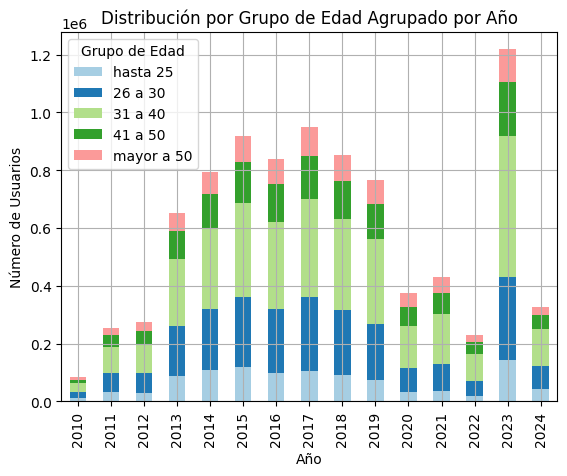

In [77]:

# Se agrupa por año y grupo de edad, luego se hace el conteo
grupo_edad_anio = df.groupby(['anio', 'grupo_edad']).size().unstack(fill_value=0)

# Se crea la grpafica de barras stacked por año
plt.figure(figsize=(12, 6))
grupo_edad_anio.plot(kind='bar', stacked=True, color=plt.cm.Paired.colors)  
plt.title('Distribución por Grupo de Edad Agrupado por Año')
plt.xlabel('Año')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=90)
plt.legend(title='Grupo de Edad')
plt.grid(True)
plt.show()


Asumiento que las muestras son representativas. De la gráfica anterior sobre la distribución de los grupos de edad por año, observamos que el grueso de usuarios para todos los años es entre 31 y 40 años, seguido del grupo 26 a 30 años. Esta distribución no ha cambiado intra años. Lo que sí ha oscilado entre años es el número total de usuarios. Siendo 2023 el año con más uso de la ecobici y naturalmente, 2010 el año con menos usuarios ya que fue el primer año de operación. Notemos también que 2024 tiene una cantidad menor de usuarios pero esto se debe a que solo se están tomando en cuenta tres meses, es decir, una cuarta parte del año. Si se proyectara linealmente, a final de año se espera tener una cantidad de usuarios semejante a 2023.

Text(0, 0.5, '')

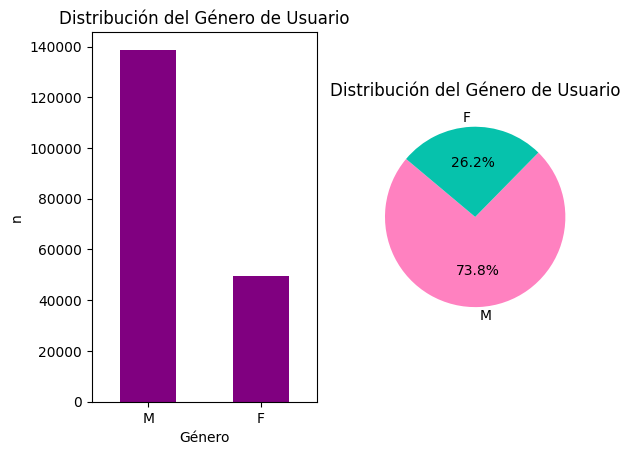

In [38]:
# Gráfico de barras para Genero_Usuario
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
df['genero_usuario'].value_counts().plot(kind='bar', color='#800080')
plt.title('Distribución del Género de Usuario')
plt.xlabel('Género')
plt.ylabel('n')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x

# Gráfico de pastel para Genero_Usuario
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
colors=['#FF81C0', '#06C2AC']
df['genero_usuario'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución del Género de Usuario')
plt.ylabel('')  # Eliminar la etiqueta del eje y para un gráfico de pastel

La gráfica anterior muestra la distribución total del género en dos tipos de gráficas considerando todo el histporico como un solo momento, es decir, agregando por todos los años. Compararemos esto con los resultados agrupados por año.

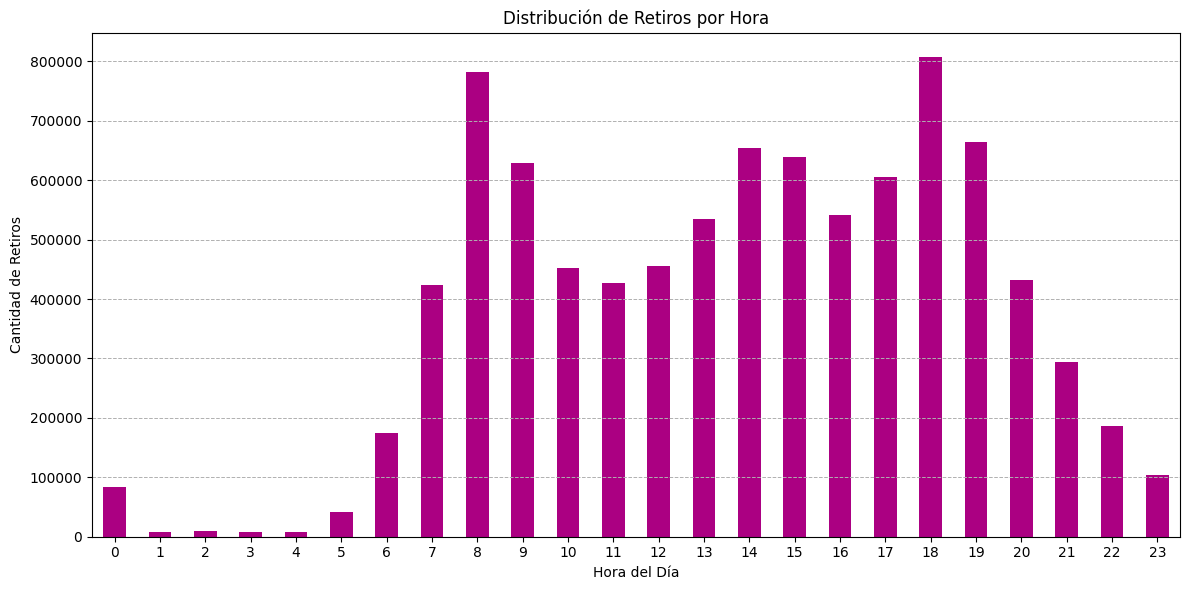

In [82]:
# Se valida de nuevo que las horas no cuenten con vacios y estén en el formato que las necesitamos
# Vamos a convertir la columna de hora a datetime, ignorando los errores y dejando las horas no válidas como NaT.
df['hora_retiro'] = pd.to_datetime(df['hora_retiro'], format='%H:%M:%S', errors='coerce')

# Eliminamos los valores NaT (Not a Time) de la columna de hora de retiro.
df.dropna(subset=['hora_retiro'], inplace=True)

# Extraemos la hora del datetime para agrupar.
df['hora'] = df['hora_retiro'].dt.hour

# Agrupamos por la hora y contamos las ocurrencias para ver la distribución de retiros por hora.
hourly_counts = df['hora'].value_counts().sort_index()

# Generamos la gráfica de barras con la distribución de retiros por hora.
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color="#AB0082")
plt.title('Distribución de Retiros por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Retiros')
plt.xticks(range(0, 24), rotation=0)  
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


De forma general, observamos que las horas en las que se hace mpas uso de las ecobicis es entre las 7am y 22hrs. Se tiene mayor uso a las 8am y 18hrs, esto puede deberse a que son las horas en que los usuarios de trasladan a sus trabajos/escuelas y hacen uso de estas como medio de transporte complementario a otros medios. 


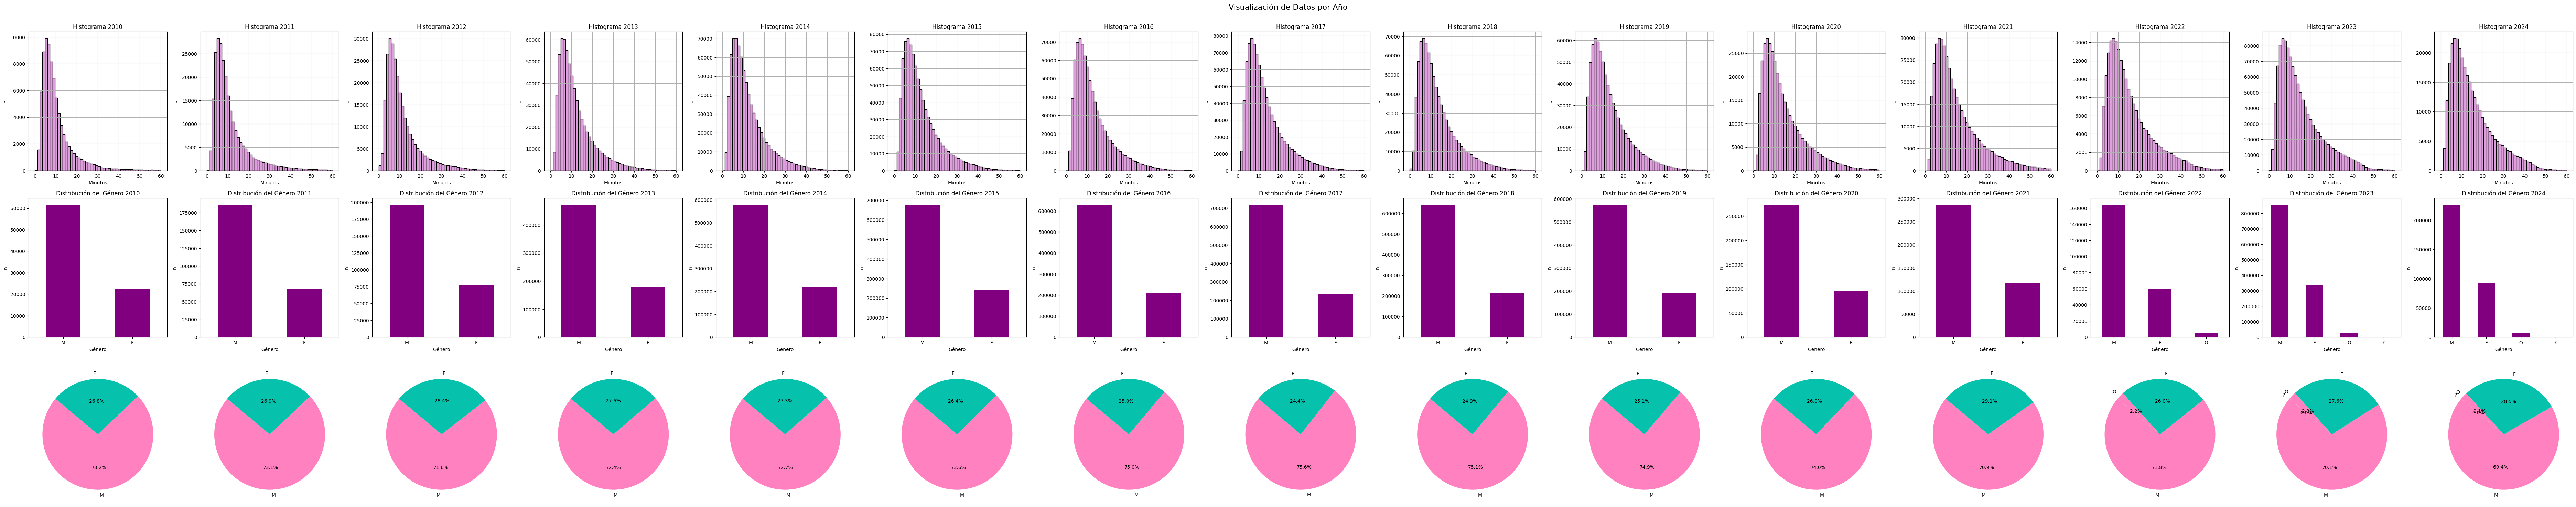

In [72]:

fig, axes = plt.subplots(nrows=3, ncols=len(years), figsize=(5 * len(years), 15))

# Se crea el grid por grafica por año
for i, year in enumerate(years):
    # Datos filtrados por año
    data_year = df[df['anio'] == year]

    # Histograma de duración de viaje
    ax_hist = axes[0, i] if len(years) > 1 else axes[0]
    data_year['duracion_viaje_minutos'].hist(bins=50, color='#DDA0DD', edgecolor='black', range=(0, 60), ax=ax_hist)
    ax_hist.set_title(f'Histograma {year}')
    ax_hist.set_xlabel('Minutos')
    ax_hist.set_ylabel('n')

    # Gráfica de barras del género
    ax_bar = axes[1, i] if len(years) > 1 else axes[1]
    data_year['genero_usuario'].value_counts().plot(kind='bar', color='#800080', ax=ax_bar)
    ax_bar.set_title(f'Distribución del Género {year}')
    ax_bar.set_xlabel('Género')
    ax_bar.set_ylabel('n')
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=0)

    # Gráfica de pie del género
    ax_pie = axes[2, i] if len(years) > 1 else axes[2]
    data_year['genero_usuario'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#FF81C0', '#06C2AC'], ax=ax_pie)
    ax_pie.set_ylabel('')

# Se imprime el layou6
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Visualización de Datos por Año', fontsize=16)
plt.show()



En el grid anterior observamos que las distribuciones para las variables de duración del viaje se ha mantenido al rededor de los 10minutos durante todo el histórico. La distribución por género tambipen se ha mantenido a lo largo de los años, siendo el género masculino el grueso de los usuarios (al rededor de un 70% hombres y 30% mujeres).

En conclusión, la distribución de las variables que se consideran en el análisis no ha cambiado mucho en el tiempo, lo que ha incrementado es el número de usuarios de la ecobici.